In [1]:
# Import Libraries
import matplotlib 
matplotlib.use('TkAgg')
from matplotlib import rc
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
# Read WCS Values in Sexadecimal (x and y) and Degree (xx and yy)

x = np.loadtxt('x_wcs.txt', dtype='string')
xx = np.loadtxt('x_wcs_deg.txt')
print 'x[0]=',x[0]

y = np.loadtxt('y_wcs.txt', dtype='string')
yy = np.loadtxt('y_wcs_deg.txt')
print 'y[0]=',y[0]


x[0]= 01h37m08.528s
y[0]= +15:43:27.91


In [3]:
# Set the Xaxis Ticks value 

# xxx is Defines with the deg+min/60 for each ticks wanted. 
# In this case it is 01h36m30s with step of 10s until 01h37m
xxx = [(1./24.)*360.+(36./(60.*24.))*360.+(30./(3600.*24.))*360.,\
       (1./24.)*360.+(36./(60.*24.))*360.+(40./(3600.*24.))*360.,\
       (1./24.)*360.+(36./(60.*24.))*360.+(50./(3600.*24.))*360.,\
       (1./24.)*360.+(37./(60.*24.))*360.+(00./(3600.*24.))*360.]

# xxxx is the Ticks value in String to inclue the h:m:s
xxxx=['36m30s','36m40s','36m50s','1h37m']
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]
# xxxxx is the Array Position of the defined xxx Values in the Data WCS 
xxxxx = np.zeros(4)
for i in range(0,4) : 
    xxxxx[i]=2*np.where(xx == find_nearest(xx,xxx[i]))[0]

In [4]:
# Set the Yaxis Ticks value 

# yyy is Defines with the deg+min/60 for each ticks wanted. 
# In this case it is +15d44m with step of 2m until +15d54m
yyy = [15+(44./(60)),\
       15+(46./(60)),\
       15+(48./(60)),\
       15+(50./(60)),\
       15+(52./(60)),\
       15+(54./(60))]

# yyyy is the Ticks value in String to inclue the $\degree$ symbol
yyyy=['+15$\degree$44','+15$\degree$46','+15$\degree$48','+15$\degree$50','+15$\degree$52','+15$\degree$54']

def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]
#yyyyy is the Array Position of the defined yyy Values in the Data WCS 
yyyyy = np.zeros(6)
for i in range(0,6) : 
    yyyyy[i]=2*np.where(yy == find_nearest(yy,yyy[i]))[0]
print yyyyy

[  214.   992.  1746.  2494.  3250.  4028.]


In [5]:
# Note for WCS overplot
# from astropy.wcs import WCS
# fits_file = 'NGC628_SN3.merged.tan.fits'
# hdu = fits.open(fits_file)[0]
# wcs = WCS(hdu.header)
            #Not convenient for the Font modification...

In [9]:
# Read Centroid position of the Ha Peak 
regxy = np.loadtxt('Region_xy_centroid_GROW.reg')
regx = regxy[0:,0]
regy = regxy[0:,1]

In [10]:
# Read Fits Data and Data Header
hdu_list = fits.open('NGC628_HIIphot3_GROW+BORDER_WCS.fits')
hdu_list.info()

image_data = hdu_list[0].data
hdu_list.close()
image_data = np.log10(image_data)
image_data[np.where(np.isfinite(image_data) == False)] = 0
print len(np.where(np.isfinite(image_data) == False))

Filename: NGC628_HIIphot3_GROW+BORDER_WCS.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (4097, 4129)   float32   
2


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log10


<IPython.core.display.Javascript object>


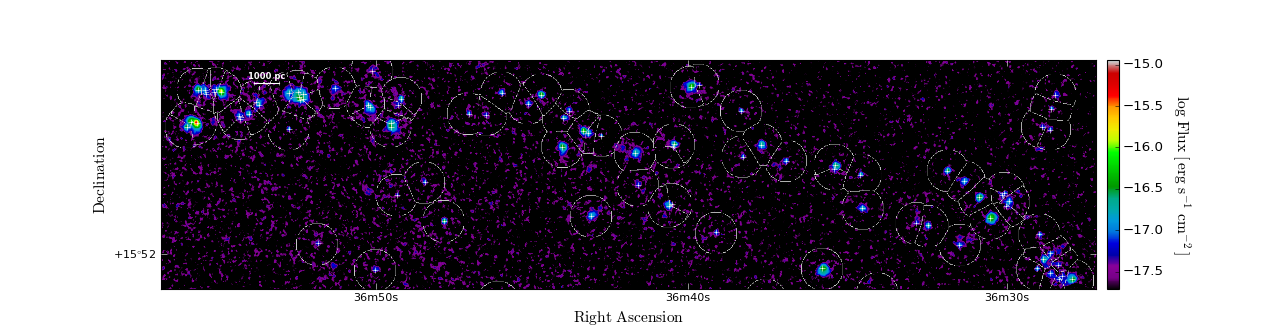

In [12]:
# Plot the Data 
%matplotlib nbagg

fig = plt.figure(figsize=(16,4.2))
plt.imshow(image_data, cmap='nipy_spectral')

# Plot the Color Scale
cbar=plt.colorbar(ticks=[-15,-15.5,-16,-16.5,-17,-17.5],pad=0.01)
cbar.set_label('$\mathrm{log\,\,Flux\,\,[\,erg\,\,s^{-1}\,\,cm^{-2}\,]}$', rotation=270, fontsize=14, labelpad=25)
plt.clim(-17.71,-14.95)

# Define the Data Plot Area
xlow = 1120
xmax = 3800
ylow = 3150
ymax = 3805
plt.xlim(xlow,xmax)
plt.ylim(ylow,ymax)

# Define the Scale of that_amount_of_pc Line Position
that_amount_of_pc = 1000
pc = str(that_amount_of_pc)+' pc' 
xlinelow = xlow + (xmax - xlow) * 0.1
xlinemax = xlow + (xmax - xlow) * 0.1 + that_amount_of_pc / (7.07 * 2)
ylinelow = ylow + (ymax - ylow) * 0.9
ylinemax = ylow + (ymax - ylow) * 0.9

# Plot the Scale of that_amount_of_pc Line Position
plt.plot([xlinelow, xlinemax], [ylinelow, ylinemax], color='w', linewidth=1, marker = '|', markersize=3)
plt.annotate(pc, xy = [(xlinemax + xlinelow)/2, (ylinemax + ylinelow)/2 + 0.0025*(ylinemax + ylinelow)], \
             ha = 'center', va = 'center', fontsize = 7.5, fontname = 'Times', color = 'w',fontweight='bold')

# Plot the Predefined Ticks

xxxxx2=[X for X in list(xxxxx) if (X >= xlow and X <= xmax)]
xxxx2 = []
for i in range(0,len(xxxxx2)):
    xxxx2.append(xxxx[np.where(xxxxx == np.array(xxxxx2[i]))[0][0]])
yyyyy2=[Y for Y in list(yyyyy) if (Y >= ylow and Y <= ymax)]
yyyy2 = []
for i in range(0,len(yyyyy2)):
    yyyy2.append(yyyy[np.where(yyyyy == np.array(yyyyy2[i]))[0][0]])

plt.xticks(xxxxx2,xxxx2, fontsize = 10)
plt.yticks(yyyyy2,yyyy2, fontsize = 10)
plt.tick_params(color='w', length=5)

# Plot the Ha Peaks Positions 
plt.plot(regx, regy, '+w', markersize=5)

# Modification of the Plot area and the Axis Labels
plt.xlabel('$\mathrm{Right\,\,Ascension}$', fontsize=14, fontname='Helvetica')
plt.ylabel('$\mathrm{Declination}$', fontsize=14, fontname='Helvetica')
plt.subplots_adjust(top=0.82)
plt.subplots_adjust(bottom=0.14)
plt.subplots_adjust(left=0.1)
plt.subplots_adjust(right=1.00)

In [13]:
#Save the Plot in a .eps or .png file
fig.savefig('NGC628_flux_reg_GROW5.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('NGC628_flux_reg_GROW5.eps')
#plt.savefig('test.png', dpi=1000)